In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/iris.csv', names= ['sepal_length','sepal_width','petal_length','petal_width','class_name'])

In [ ]:
dataset = data.copy()
label_data = dataset.pop('class_name')
print(dataset)
print(label_data)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class_name, Length: 150, dtype: 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
e = LabelEncoder()
e.fit(label_data)
Y = e.transform(label_data)
Y_encorded = tf.keras.utils.to_categorical(Y)

print(Y_encorded)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [ ]:
X_train1, X_test, Y_train1, Y_test = train_test_split(dataset, Y_encorded, test_size=0.1, shuffle=True)
X_train, X_val, Y_train, Y_val = train_test_split(X_train1, Y_train1, test_size=0.2, shuffle=True)

print(X_train.shape)
print(Y_train.shape)

(108, 4)
(108, 3)


In [ ]:
input_layer = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(16, activation='sigmoid')(input_layer)
x = tf.keras.layers.Dense(32, activation='sigmoid')(x)
output_layer = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(inputs=[input_layer], outputs = [output_layer])
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 99        
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
metrics = tf.keras.metrics.categorical_accuracy

model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

In [ ]:
result = model.fit(X_train, Y_train, epochs=200, batch_size=50, validation_data=(X_val, Y_val))

Epoch 1/200
3/3 [==============================] - 0s 77ms/step - loss: 1.1463 - categorical_accuracy: 0.3611 - val_loss: 1.2136 - val_categorical_accuracy: 0.2222
Epoch 2/200
3/3 [==============================] - 0s 8ms/step - loss: 1.1333 - categorical_accuracy: 0.3611 - val_loss: 1.1898 - val_categorical_accuracy: 0.2222
Epoch 3/200
3/3 [==============================] - 0s 11ms/step - loss: 1.1215 - categorical_accuracy: 0.3611 - val_loss: 1.1740 - val_categorical_accuracy: 0.2222
Epoch 4/200
3/3 [==============================] - 0s 9ms/step - loss: 1.1152 - categorical_accuracy: 0.3611 - val_loss: 1.1657 - val_categorical_accuracy: 0.2222
Epoch 5/200
3/3 [==============================] - 0s 19ms/step - loss: 1.1094 - categorical_accuracy: 0.3611 - val_loss: 1.1639 - val_categorical_accuracy: 0.2222
Epoch 6/200
3/3 [==============================] - 0s 10ms/step - loss: 1.1054 - categorical_accuracy: 0.3611 - val_loss: 1.1535 - val_categorical_accuracy: 0.2222
Epoch 7/200
3/3 [=

In [ ]:
loss = result.history['loss']
val_loss = result.history['val_loss']

In [ ]:
print(result.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


1/1 [==============================] - 0s 14ms/step - loss: 1.0457 - categorical_accuracy: 0.6000

 Test rmse: 0.6000


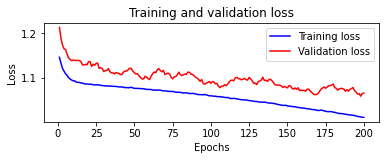

In [ ]:
# loss와 val_loss를 그래프
epochs = range(1, len(loss)+1)
plt.subplot(211)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(X_test, Y_test)[1]))

plt.show()

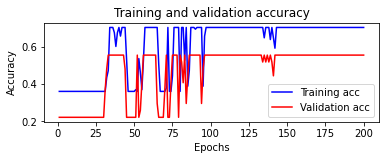

In [ ]:
acc = result.history['categorical_accuracy']
val_acc = result.history['val_categorical_accuracy']

plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
model.save('iris_multi_model.h5')

In [76]:
data = pd.read_csv('/content/iris.csv', names= ['sepal_length','sepal_width','petal_length','petal_width','class_name'])

In [77]:
dataset = data.copy()
label_data = dataset.pop('class_name')

In [78]:
e = LabelEncoder()
e.fit(label_data)
Y = e.transform(label_data)
Y_encorded = tf.keras.utils.to_categorical(Y)

In [79]:
X_train1, X_test, Y_train1, Y_test = train_test_split(dataset, Y_encorded, test_size=0.1, shuffle=True)
X_train, X_val, Y_train, Y_val = train_test_split(X_train1, Y_train1, test_size=0.2, shuffle=True)

In [81]:
model_path = "./{epoch:02d}-{val_loss:.4f}.h5"

model = tf.keras.models.load_model('iris_multi_model.h5')

In [83]:
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

1/1 [==============================] - 0s 113ms/step - loss: 1.0576 - categorical_accuracy: 0.6000

 Test Accuracy: 0.6000


In [84]:
data = pd.read_csv('/content/iris.csv', names= ['sepal_length','sepal_width','petal_length','petal_width','class_name'])

In [85]:
dataset = data.copy()
label_data = dataset.pop('class_name')

In [86]:
e = LabelEncoder()
e.fit(label_data)
Y = e.transform(label_data)
Y_encorded = tf.keras.utils.to_categorical(Y)

In [87]:
X_train1, X_test, Y_train1, Y_test = train_test_split(dataset, Y_encorded, test_size=0.1, shuffle=True)
X_train, X_val, Y_train, Y_val = train_test_split(X_train1, Y_train1, test_size=0.2, shuffle=True)

In [88]:
model = tf.keras.models.load_model('iris_multi_model.h5')
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 99        
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [89]:
# 모델 컴파일
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss=loss,
             optimizer=optimizer,
             metrics=[tf.keras.metrics.categorical_accuracy])

In [96]:
import math

def step_decay(epoch):
	initial_lrate = 0.001
	drop = 0.98
	epochs_drop = 50.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [107]:
from datetime import datetime
# 개인 컴퓨터에서 텐서보드 로드하기
logdir = "log_dir/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
file_writer = tf.summary.create_file_writer(logdir + "/metrics")
file_writer.set_as_default()

In [108]:
modelpath = "./{epoch:02d}-{val_loss : .4f}.h5"
callback_list = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),
                 tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True),
                 tf.keras.callbacks.LearningRateScheduler(step_decay, verbose=1),
                 tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)]

In [109]:
result = model.fit(X_train, Y_train, epochs=200, batch_size= 50, validation_data = (X_val, Y_val), callbacks=callback_list)
#save('iris_multi_model2.h5')

Epoch 1/200

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
3/3 [==============================] - 0s 24ms/step - loss: 0.8786 - categorical_accuracy: 0.8241 - val_loss: 0.8651 - val_categorical_accuracy: 0.8519


KeyError: ignored

In [93]:
print(result.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


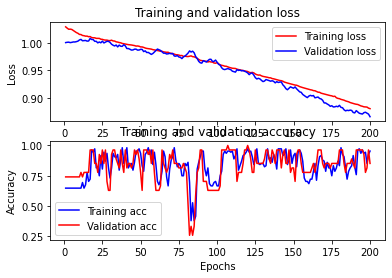

In [94]:
### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
val_loss = result.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 binary_accuracy와 val_binary_accuracy key를 가지는 값들만 추출
acc = result.history['categorical_accuracy']
val_acc = result.history['val_categorical_accuracy']

### binary_accuracy와 val_binary_accuracy key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()